In [1]:
include("LM.jl")
include("solvers.jl")

quasi_newton_bfgs (generic function with 1 method)

In [2]:
using ADNLPModels, JSOSolvers, NLSProblems, SolverBenchmark

In [3]:
problems_names = setdiff(names(NLSProblems), [:NLSProblems])
problems = (eval((problem))() for problem ∈ problems_names)

Base.Generator{Vector{Symbol}, var"#15#16"}(var"#15#16"(), [:BNST2, :BNST3, :LVcon501, :LVcon502, :LVcon503, :LVcon504, :LVcon511, :LVcon512, :LVcon513, :LVcon514  …  :tp354, :tp355, :tp358, :tp370, :tp371, :tp372, :tp373, :tp379, :tp394, :tp395])

In [4]:
solvers = Dict(:lm_param => lm_param, :quasi_newton_bfgs => quasi_newton_bfgs)
stats = bmark_solvers(solvers, problems)

┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST2     200     199        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           BNST3     200     100        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.1      20      18        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.2      20      13        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.3      20       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.4      20      18        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.11      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.12      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.13      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.14      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.15      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.16      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.17      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info: Lukšan-Vlček 5.18      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            NZF1      13       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs01       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs02       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs06       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs13       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs14       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs16       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs17       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs18       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs20       2       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs21       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs22       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs23       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:            Name    nvar    ncon           status      Time      f(x)      Dual    Primal  
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:127
┌ Info:            hs25       3       0      first_order   0.0e+00   1.6e+01       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs26       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs27       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs28       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs30       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs31       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs32       3       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs42       4       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs43       4       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs46       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs48       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs49       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs50       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs51       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs52       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs53       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs57       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs60       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs61       3       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs65       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs70       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs77       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:            hs79       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh01       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh02       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh03       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh04       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh05       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh06       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh07       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh08       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh09       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh10       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh11       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh12       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh13       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh14       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh15       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh16       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh17       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh18       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh19      11       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh20       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh21      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh22      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh23       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh24       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh25      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh26      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh27      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh28      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh29      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh30      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh31      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh32      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh33      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh34      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           mgh01       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp201       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp202       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp203       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp204       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp205       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp206       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp207       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp208       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp209       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp210       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp211       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp212       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp213       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp216       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp224       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp225       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp227       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp229       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp231       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp233       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp235       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp240       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp241       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp242       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp244       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp245       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp246       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp247       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp249       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp252       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp256       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp260       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp261       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp264       4       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp266       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp267       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp268       5       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp269       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp271       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp272       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp273       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp282      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp286      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp288      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp290       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp291      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp292      30       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp293      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp294       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp295      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp296      16       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp297      30       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp298      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp299     100       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp303      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp304      50       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp305     100       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp307       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp308       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp311       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp312       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp316       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp317       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp318       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/sr

┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp319       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp320       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp321       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/sr

┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp322       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp323       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp324       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp326       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp327       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp333       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp334       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp337       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp344       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp345       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp350       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp351       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp352       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp354       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175


┌ Info:           tp355       4       1      first_order   0.0e+00   6.0e+01       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp358       5       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp370       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp371       9       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp372       9      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp373       9       6        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp379      11       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155


┌ Info:           tp394      20       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = UndefVarError(:armijo)
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:155
┌ Info:           tp395      50       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: BNST2
   All variables: ████████████████████ 200    All constraints: ████████████████████ 199      All residuals: ████████████████████ 200   
            free: ████████████████████ 200               free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 200   
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0    

┌ Info:           BNST2     200     199        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: BNST3
   All variables: ████████████████████ 200    All constraints: ████████████████████ 100      All residuals: ████████████████████ 200   
            free: ████████████████████ 200               free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 200   
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 99.50% sparsity)   200   
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅

┌ Info: Lukšan-Vlček 5.2      20      13        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: Lukšan-Vlček 5.3
   All variables: ████████████████████ 20     All constraints: ████████████████████ 2        All residuals: ████████████████████ 36    
            free: ████████████████████ 20                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 18    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 18    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 90.00% sparsity)   72    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 74.29% sparsity)   54    
         

┌ Info: Lukšan-Vlček 5.11      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: Lukšan-Vlček 5.12
   All variables: ████████████████████ 21     All constraints: ████████████████████ 15       All residuals: ████████████████████ 20    
            free: ████████████████████ 21                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 90.48% sparsity)   40    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 87.01% sparsity)   30    
       

┌ Info: Lukšan-Vlček 5.14      20      12        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: Lukšan-Vlček 5.15
   All variables: ████████████████████ 21     All constraints: ████████████████████ 15       All residuals: ████████████████████ 20    
            free: ████████████████████ 21                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 90.48% sparsity)   40    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 87.01% sparsity)   30    
       

┌ Info: Lukšan-Vlček 5.15      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: Lukšan-Vlček 5.16
   All variables: ████████████████████ 21     All constraints: ████████████████████ 15       All residuals: ████████████████████ 20    
            free: ████████████████████ 21                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 92.86% sparsity)   30    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 93.51% sparsity)   15    
       

┌ Info: Lukšan-Vlček 5.18      21      15        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: NZF1
   All variables: ████████████████████ 13     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 5     
            free: ████████████████████ 13                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 5     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 70.77% sparsity)   19    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 84.62% sparsity)   14    
           fixed: ⋅⋅

┌ Info:            NZF1      13       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs01
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           lower: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 25.00% sparsity)   3     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 66.67% sparsity)   1     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs06       2       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs13
   All variables: ████████████████████ 2      All constraints: ████████████████████ 1        All residuals: ████████████████████ 2     
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 2     
           lower: ████████████████████ 2                lower: ████████████████████ 1            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 50.00% sparsity)   2     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs16       2       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs17
   All variables: ████████████████████ 2      All constraints: ████████████████████ 2        All residuals: ████████████████████ 2     
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ████████████████████ 2            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 25.00% sparsity)   3     
         low/upp: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 66.67% sparsity)   1     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs20       2       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs21
   All variables: ████████████████████ 2      All constraints: ████████████████████ 1        All residuals: ████████████████████ 2     
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ████████████████████ 1            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 50.00% sparsity)   2     
         low/upp: ████████████████████ 2              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs23       2       5        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs25
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 99    
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 99    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   297   
         low/upp: ████████████████████ 3              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (-9800.00% sparsity)   594   
           fixed: ⋅⋅

┌ Info:            hs27       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs28
   All variables: ████████████████████ 3      All constraints: ████████████████████ 1        All residuals: ████████████████████ 2     
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 33.33% sparsity)   4     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs31       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs32
   All variables: ████████████████████ 3      All constraints: ████████████████████ 2        All residuals: ████████████████████ 2     
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 2     
           lower: ████████████████████ 3                lower: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 16.67% sparsity)   5     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs43       4       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs46
   All variables: ████████████████████ 5      All constraints: ████████████████████ 2        All residuals: ████████████████████ 4     
            free: ████████████████████ 5                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 75.00% sparsity)   5     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 86.67% sparsity)   2     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs49       5       2        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs50
   All variables: ████████████████████ 5      All constraints: ████████████████████ 3        All residuals: ████████████████████ 4     
            free: ████████████████████ 5                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ███████████████⋅⋅⋅⋅⋅ 3     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: █████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 60.00% sparsity)   8     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 80.00% sparsity)   3     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs52       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs53
   All variables: ████████████████████ 5      All constraints: ████████████████████ 3        All residuals: ████████████████████ 4     
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 4     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 70.00% sparsity)   6     
         low/upp: ████████████████████ 5              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs60       3       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs61
   All variables: ████████████████████ 3      All constraints: ████████████████████ 2        All residuals: ████████████████████ 3     
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 3     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 66.67% sparsity)   3     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs70       4       1        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: hs77
   All variables: ████████████████████ 5      All constraints: ████████████████████ 2        All residuals: ████████████████████ 5     
            free: ████████████████████ 5                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████⋅⋅⋅⋅⋅⋅⋅⋅ 3     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 76.00% sparsity)   6     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 86.67% sparsity)   2     
           fixed: ⋅⋅⋅⋅

┌ Info:            hs79       5       3        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh01
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 25.00% sparsity)   3     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 66.67% sparsity)   1     
           fixed: ⋅⋅⋅

┌ Info:           mgh03       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh04
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 3     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████████⋅⋅⋅⋅⋅⋅ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ███████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 33.33% sparsity)   4     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  0.00% sparsity)   3     
           fixed: ⋅⋅⋅

┌ Info:           mgh06       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh07
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 3     
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ███████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████████⋅⋅⋅⋅⋅⋅ 2     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 33.33% sparsity)   6     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  0.00% sparsity)   6     
           fixed: ⋅⋅⋅

┌ Info:           mgh09       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh10
   All variables: ████████████████████ 3      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 16    
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 16    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   48    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (-1500.00% sparsity)   96    
           fixed: ⋅

┌ Info:           mgh12       3       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh13
   All variables: ████████████████████ 4      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 4     
            free: ████████████████████ 4                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 2     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 50.00% sparsity)   8     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 40.00% sparsity)   6     
           fixed: ⋅⋅⋅

┌ Info:           mgh15       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh16
   All variables: ████████████████████ 4      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 20    
            free: ████████████████████ 4                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 20    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   80    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (-1100.00% sparsity)   120   
           fixed: ⋅

┌ Info:           mgh18       6       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh19
   All variables: ████████████████████ 11     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 65    
            free: ████████████████████ 11                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 65    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   715   
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (-1968.18% sparsity)   1365  
           fixed: ⋅

┌ Info:           mgh21      20       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh22
   All variables: ████████████████████ 20     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 20    
            free: ████████████████████ 20                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 10    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 90.00% sparsity)   40    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 90.48% sparsity)   20    
           fixed: ⋅⋅⋅

┌ Info:           mgh24       4       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh25
   All variables: ████████████████████ 10     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 12    
            free: ████████████████████ 10                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ███████████████████⋅ 11    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 75.00% sparsity)   30    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  0.00% sparsity)   55    
           fixed: ⋅⋅⋅

┌ Info:           mgh27      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh28
   All variables: ████████████████████ 10     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 10    
            free: ████████████████████ 10                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 10    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 72.00% sparsity)   28    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 81.82% sparsity)   10    
           fixed: ⋅⋅⋅

┌ Info:           mgh30      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh31
   All variables: ████████████████████ 10     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 10    
            free: ████████████████████ 10                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 10    
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 46.00% sparsity)   54    
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  1.82% sparsity)   54    
           fixed: ⋅⋅⋅

┌ Info:           mgh33      10       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: mgh34
   All variables: ████████████████████ 10     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 20    
            free: ████████████████████ 10                free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 20    
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 28.00% sparsity)   144   
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅

┌ Info:           mgh01       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: tp201
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ████████████████████ 2     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 50.00% sparsity)   2     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (100.00% sparsity)   0     
           fixed: ⋅⋅⋅

┌ Info:           tp203       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: tp204
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 3     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 3     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   6     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (-200.00% sparsity)   9     
           fixed: ⋅⋅

┌ Info:           tp206       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: tp207
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 25.00% sparsity)   3     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 66.67% sparsity)   1     
           fixed: ⋅⋅⋅

┌ Info:           tp209       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: tp210
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 2     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ██████████⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: ( 25.00% sparsity)   3     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: ( 66.67% sparsity)   1     
           fixed: ⋅⋅⋅

┌ Info:           tp212       2       0        exception       Inf       Inf       Inf       Inf
└ @ SolverBenchmark /Users/jules/.julia/packages/SolverBenchmark/YM13z/src/run_solver.jl:175
┌ Error: caught exception
│   e = MethodError(lm_param, (NLPModelsJuMP.MathOptNLSModel
  Problem name: tp213
   All variables: ████████████████████ 2      All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0        All residuals: ████████████████████ 1     
            free: ████████████████████ 2                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0            nonlinear: ████████████████████ 1     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzj: (  0.00% sparsity)   2     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 nnzh: (  0.00% sparsity)   3     
           fixed: ⋅⋅⋅

Excessive output truncated after 525065 bytes.

Dict{Symbol, DataFrames.DataFrame} with 2 entries:
  :quasi_newton_bfgs => 175×39 DataFrame…
  :lm_param          => 175×39 DataFrame…

In [7]:
cols = [:name, :status, :objective, :elapsed_time, :iter]
pretty_stats(stats[:lm_param][!, cols])

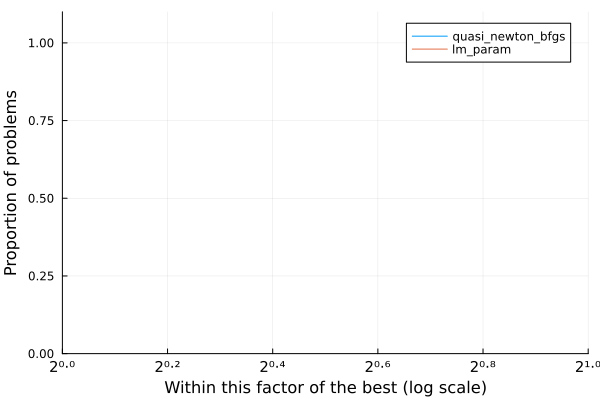

In [8]:
cost(df) = (df.status .!= :first_order) * Inf + df.iter
performance_profile(stats, cost)